In [4]:
from sklearn.decomposition import PCA
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [5]:
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

In [6]:
mean = pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('./model/model_svm.pickle','rb'))
model_pca = pickle.load(open('./model/pca_50.pickle','rb'))


gender_pre = ['male','female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [7]:
#test data
test_data_path = './data/male_000281.jpg'
color = 'bgr'
#step-read image 
img = cv2.imread(test_data_path)

def pipeline_model(img,color='rgb'):
    #conv into gray scale 
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


    #step4 - crop face
    faces = haar.detectMultiScale(gray,1.5,3)

    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi = gray[y:y+h,x:x+h]
        #normalization 
        roi = roi/255.0


        #step 5 resize
        if roi.shape[1] > 100:
            roi_resize= cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize= cv2.resize(roi,(100,100),cv2.INTER_CUBIC)

        roi_reshape = roi_resize.reshape(1,10000)
        #step-7 subtract with meean

        roi_mean = roi_reshape - mean
        #step-8 get eigen image 
        eigen_image =  model_pca.transform(roi_mean)

        #step - 9 
        results = model_svm.predict(eigen_image)[0]

         #step-10
        predict = results
        score = .82
        print(results)
        #step-10
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img


    
    

    


0


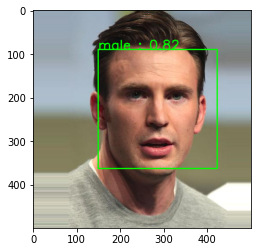

In [8]:
from PIL import Image 

test_data_path = './data/male_000281.jpg'
color = 'bgr'
#step-read image 
img = Image.open(test_data_path)#rgb
img = np.array(img)
#ste[ 3: pass too pipeline]
img = pipeline_model(img)

plt.imshow(img)

In [9]:
#apply to video 


In [10]:
cap = cv2.VideoCapture('./data/video.mp4')

In [11]:
while True:
    ret, frame = cap.read()
    frame = pipeline_model(frame)
    if ret == False:
        break
        
    cv2.imshow('Gender detection', frame)
    if cv2.waitKey(10) == ord('s'):
        break

cv2.destroyAllWindows()
cap.release()
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
0
1
1
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
